In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Import for audio playback
import IPython.display as ipd
from IPython.display import Audio

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data Import

In [3]:
indo_path = "indo_wave_sentiment_dataset"
indo_list = os.listdir(indo_path)
indo_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10']

Actors
(01-10) actors, odd numbers are male actors, while even numbers are female actors

Emotion Class
(01) neutral, (02) happy, (03) surprise, (04) disgust, (05) disappointed

Intensity
(01) normal, (02) strong

Repetition
(01) first repetition, (02) second repetition, (03) third repetition

For example, a file with the name “07-03-02-03.wav” contains information that the actors is male (07), with surprise emotion (03), strong intensity (02), on the third repetition (03).

In [16]:
file_emotion = []
file_path = []

for i in indo_list:
    actor = os.listdir(indo_path + "/" + i)
    # print(actor)
    for file in actor:
        part = file.split('.')[0]
        # print(part)
        part = part.split('-')
        # print(part)
        file_emotion.append(int(part[1]))
        file_path.append(indo_path + "/" + i + "/" + file)

# show values in list
print(file_emotion)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]


In [5]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[1]))
print(file)

10-01-01-01.wav
10
indo_wave_sentiment_dataset/Actor_01/01-01-01-01.wav
2
10-05-02-03.wav


In [17]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
indo_emotion_df = pd.concat([emotion_df, path_df], axis=1)
indo_emotion_df.Emotions.replace({1: 'neutral', 2: 'happy', 3: 'surprise', 4: 'disgust', 5: 'disappointed'}, inplace=True)
print(indo_emotion_df.head())
print("______________________")
print(indo_emotion_df.tail())
print("______________________")
print(indo_emotion_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  indo_wave_sentiment_dataset/Actor_01/01-01-01-...
1  neutral  indo_wave_sentiment_dataset/Actor_01/01-01-01-...
2  neutral  indo_wave_sentiment_dataset/Actor_01/01-01-01-...
3  neutral  indo_wave_sentiment_dataset/Actor_01/01-01-02-...
4  neutral  indo_wave_sentiment_dataset/Actor_01/01-01-02-...
______________________
         Emotions                                               Path
295  disappointed  indo_wave_sentiment_dataset/Actor_10/10-05-01-...
296  disappointed  indo_wave_sentiment_dataset/Actor_10/10-05-01-...
297  disappointed  indo_wave_sentiment_dataset/Actor_10/10-05-02-...
298  disappointed  indo_wave_sentiment_dataset/Actor_10/10-05-02-...
299  disappointed  indo_wave_sentiment_dataset/Actor_10/10-05-02-...
______________________
Emotions
neutral         60
happy           60
surprise        60
disgust         60
disappointed    60
Name: count, dtype: int64


In [18]:
# convert indo_emotion_df to dataframe
indo_emotion_path = pd.DataFrame(indo_emotion_df)
indo_emotion_path.to_csv('indo_emotion_path.csv', index=False)
indo_emotion_path.head()

,Emotions,Path
0,neutral,indo_wave_sentiment_dataset/Actor_01/01-01-01-...
1,neutral,indo_wave_sentiment_dataset/Actor_01/01-01-01-...
2,neutral,indo_wave_sentiment_dataset/Actor_01/01-01-01-...
3,neutral,indo_wave_sentiment_dataset/Actor_01/01-01-02-...
4,neutral,indo_wave_sentiment_dataset/Actor_01/01-01-02-...


In [20]:
print(len(indo_emotion_path))
print(indo_emotion_path.Emotions.value_counts())

300
Emotions
neutral         60
happy           60
surprise        60
disgust         60
disappointed    60
Name: count, dtype: int64


In [23]:
data, sr = librosa.load(indo_emotion_path.Path[0])
sr

22050

In [25]:
ipd.Audio(indo_emotion_path.Path[0], rate=sr)

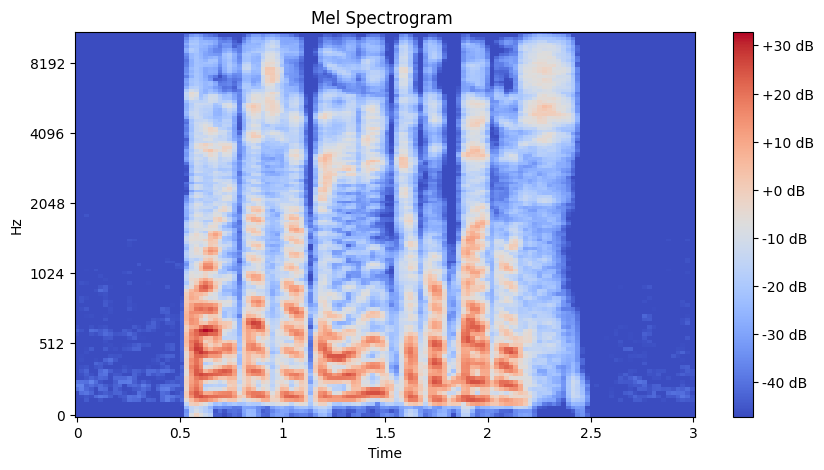

In [30]:
# Create Log-Mel Spectrogram
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

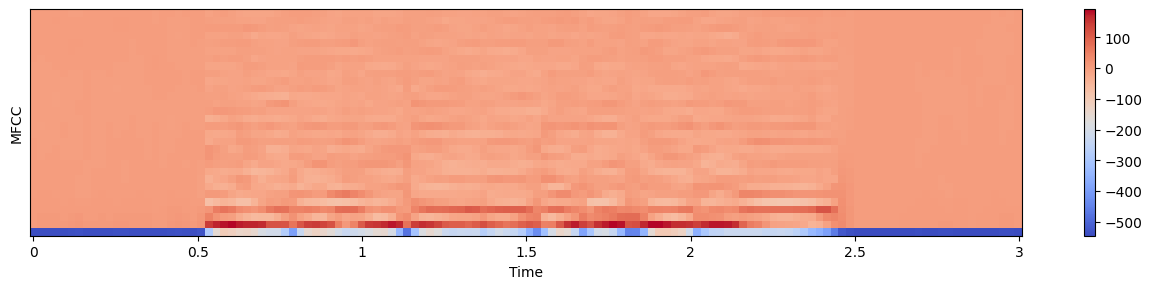

In [33]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data Augmentation

In [52]:
# Noise
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Stretch
def stretch(data, rate=0.8):
    # Lakukan time stretching langsung pada data suara
    return librosa.effects.time_stretch(data, rate)

# Pitch
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# Shift
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)


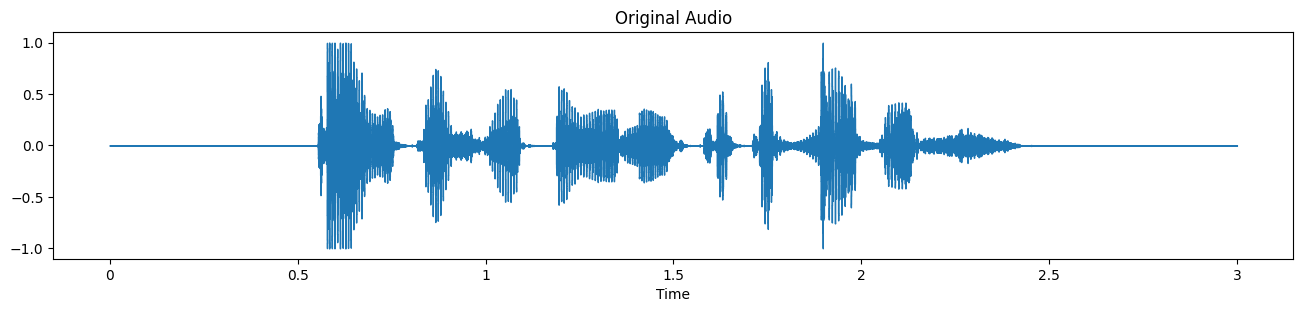

In [40]:
# Normal Audio
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.waveshow(data, sr=sr)
plt.title('Original Audio')
ipd.Audio(data, rate=sr)

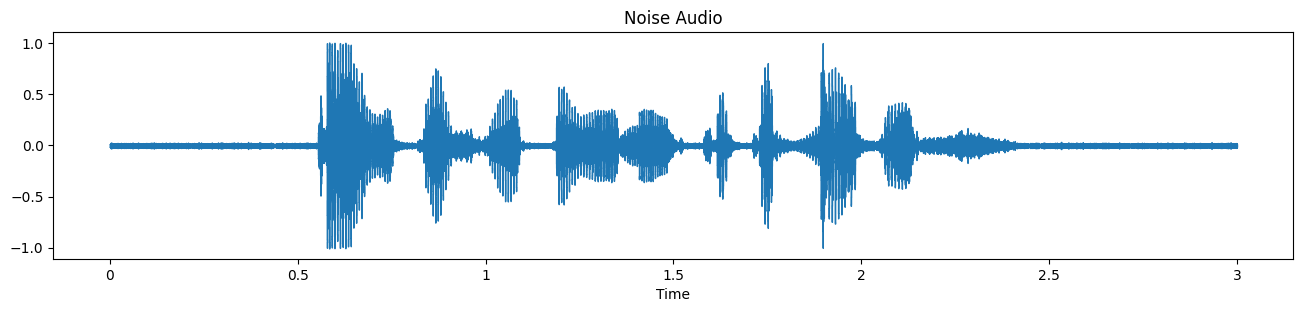

In [41]:
# Audio with Noise
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
data_noise = noise(data)
librosa.display.waveshow(data_noise, sr=sr)
plt.title('Noise Audio')
ipd.Audio(data_noise, rate=sr)

IndexError: tuple index out of range

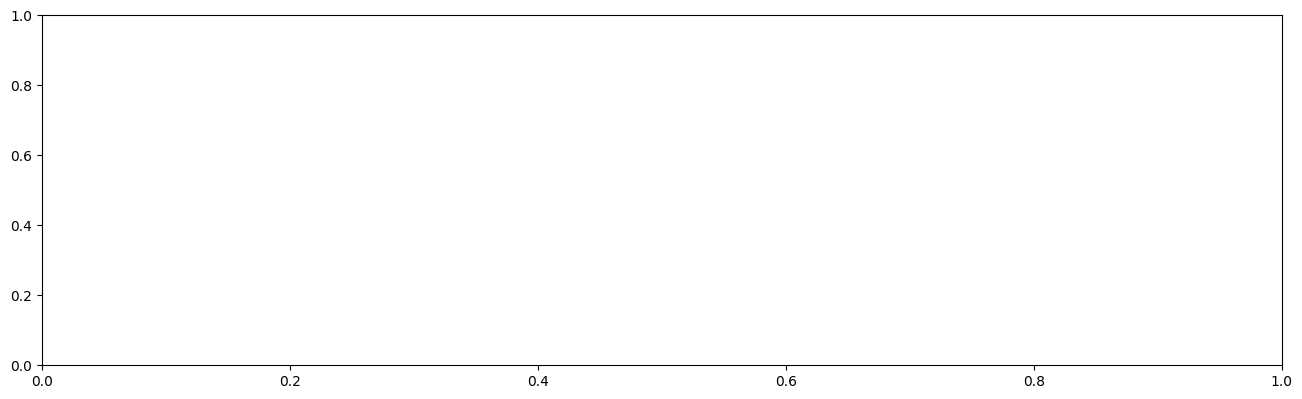

In [55]:
# Stretched Audio
plt.figure(figsize=(16, 10))
plt.subplot(2,1,2)
data_stretch = stretch(data, rate=0.8)
librosa.display.waveshow(data_stretch, sr=sr)
plt.title('Stretched Audio')
plt.show()

TypeError: pitch_shift() takes 1 positional argument but 3 were given

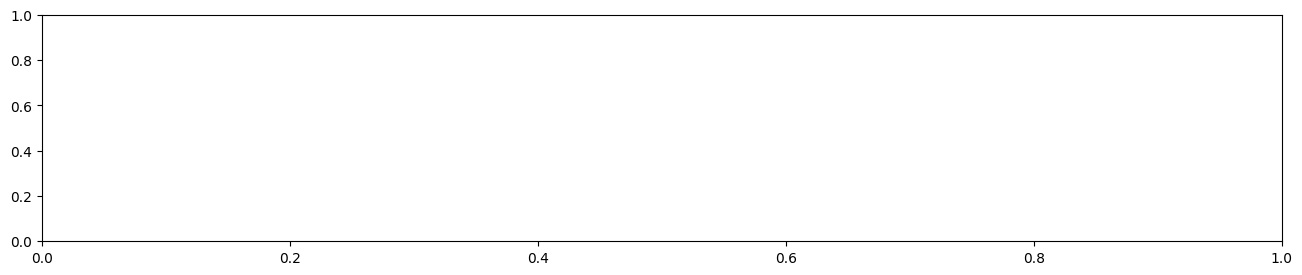

In [56]:
# Audio with Pitch
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
data_pitch = pitch(data, sr)
librosa.display.waveshow(data_pitch, sr=sr)
plt.title('Pitch Audio')
ipd.Audio(data_pitch, rate=sr)

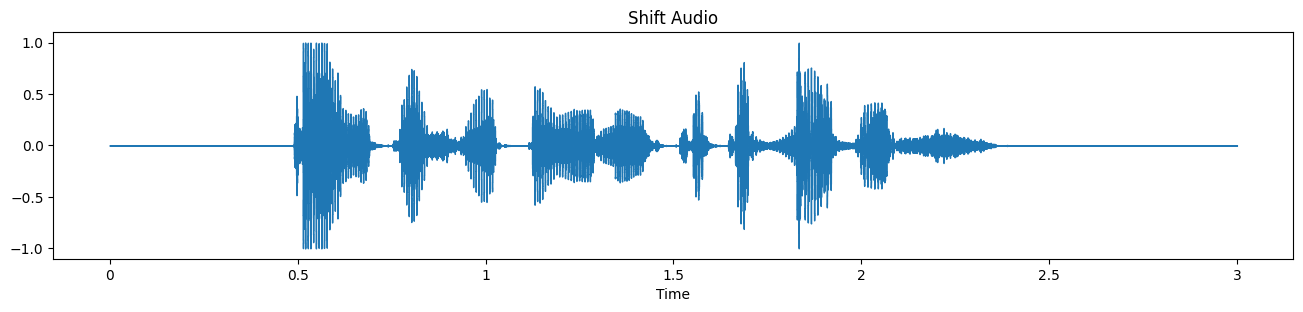

In [57]:
# Audio with Shift
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
data_shift = shift(data)
librosa.display.waveshow(data_shift, sr=sr)
plt.title('Shift Audio')
ipd.Audio(data_shift, rate=sr)

# Feature Extraction

In [58]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

# Get Features

In [59]:
import timeit
from tqdm import tqdm

start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(indo_emotion_path.Path,indo_emotion_path.Emotions,range(len(indo_emotion_path)))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

0it [00:00, ?it/s]


TypeError: pitch_shift() takes 1 positional argument but 3 were given